<a href="https://colab.research.google.com/github/pavansai26/911-call-data-analysis/blob/main/911_call_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

# **911 Calls**

# Created by Congress in 2004 as the 911 Implementation and Coordination Office (ICO), the National 911 Program is housed within the National Highway Traffic Safety Administration at the U.S. Department of Transportation and is a joint program with the National Telecommunication and Information Administration in the Department of Commerce.

# **Exploratory Analysis Project**

# One of the objectives of this notebook is to show step-by-step how to analyze and visualize the dataset to better understand 911 calls and what originates them. Moreover, we are going to explain most of the concepts used so that you understand why we are using them

# **Attribute Description**

# lat : String variable, Latitude
#lng: String variable, Longitude
#desc: String variable, Description of the Emergency Call
#zip: String variable, Zipcode
#title: String variable, Title
#timeStamp: String variable, YYYY-MM-DD HH:MM:SS
#twp: String variable, Township
#addr: String variable, Address
#e: String variable, Dummy variable (always 1)

# **importing the necessary libraries**

In [77]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Plotting style**

In [78]:
sns.set_style("whitegrid")
sns.set_palette("muted")
plt.style.use("fivethirtyeight")

# **ignoring the warnings**

In [79]:
import warnings
warnings.filterwarnings('ignore',category = DeprecationWarning)
warnings.filterwarnings('ignore',category = UserWarning)
warnings.filterwarnings('ignore',category = RuntimeWarning)
warnings.filterwarnings('ignore',category = FutureWarning)

# **setting the no.of rows and columns**

In [80]:
pd.set_option('display.max_rows',100000)
pd.set_option('display.max_columns',1000)

# **accessing the drive**

In [81]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


# **Reading the Data**

In [82]:
df = pd.read_csv('/gdrive/My Drive/Colab Notebooks/911.csv')

# **printing the data only top 5**

In [83]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


# **dataset description**

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


# **No.of columns**

In [85]:
len(df.columns)

9

# No.of columns : 9

# **observations in the data**

In [86]:
df.shape[:1]

(663522,)

# No.of observations : 663522

# **Basic Analysis**

# **Which features contain blank, null or empty values?**

In [136]:
print('Missing values:',df.isnull().values.sum())
print()
df.isnull().sum()

Missing values: 80492



lat                0
lng                0
desc               0
zip            80199
title              0
timeStamp          0
twp              293
addr               0
e                  0
Reason             0
Hour               0
Month              0
Day of Week        0
Date               0
dtype: int64

# **How many zip codes does the dataset have?**

In [137]:
df['zip'].nunique()

204

# **Let's check out the top 5 zipcodes for calls.**

In [138]:
df_zip = pd.DataFrame(df['zip'].value_counts().head(5))
df_zip.rename(columns = {'zip':'Top 5'}, inplace = True)
df_zip.style.background_gradient(cmap='Blues')

,Top 5
19401.0,45606
19464.0,43910
19403.0,34888
19446.0,32270
19406.0,22464


# **Let's check out the  top townships for the calls were as follows:**

In [140]:
df_twp = pd.DataFrame(df['twp'].value_counts().head(5))
df_twp.rename(columns = {'twp':'Top 5'}, inplace = True)
df_twp.style.background_gradient(cmap='Greens')

,Top 5
LOWER MERION,55490
ABINGTON,39947
NORRISTOWN,37633
UPPER MERION,36010
CHELTENHAM,30574


# **For 90k + entries, how many unique call titles did we have?**

In [89]:
df['title'].nunique()

148

# Total we have 148 unique call titles

# **top 10 emergency calls from all the categories.**

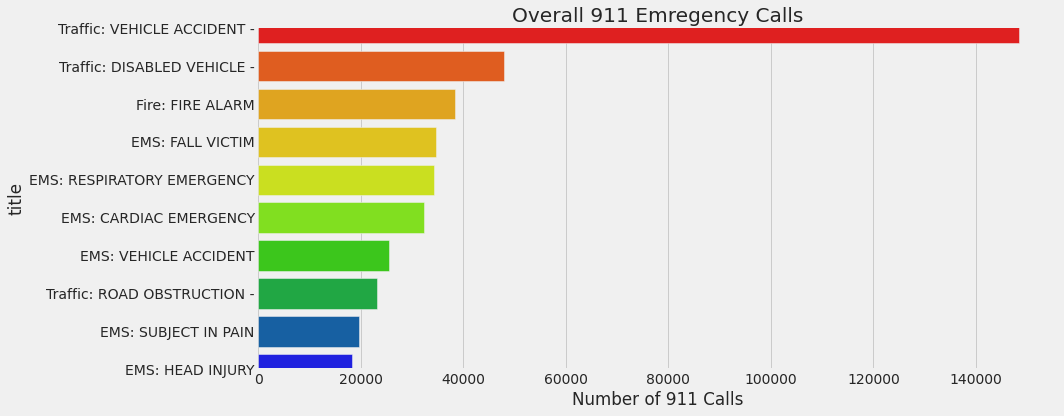

In [148]:
plt.figure(figsize=(15,6))
sns.countplot(y='title', data=df, order=df['title'].value_counts().index, palette='prism')

sns.despine(bottom=False, left=True)
#et or set the y-limits of the current axes.
plt.ylim([9,0])

plt.xlabel('Number of 911 Calls')
#putting title to the barchart
plt.title('Overall 911 Emregency Calls')

plt.tight_layout()

# **Data Wrangling for Feature Creation**

#We can extract some generalised features from the columns in our dataset for further analysis.

#In the title column, there's a kind of 'subcategory' or 'reason for call' alloted to each entry (denoted by the text before the colon).

#The timestamp column can be further segregated into Year, Month and Day of Week too.



# **Let's start with creating a 'Reason' feature for each call.**

In [90]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

# **printing the last 5 observations**

In [91]:
df.tail()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1,Traffic
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1,EMS
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1,EMS
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1,Fire
663521,40.015046,-75.299674,HAVERFORD STATION RD & W MONTGOMERY AVE; LOWER...,19041.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:52:46,LOWER MERION,HAVERFORD STATION RD & W MONTGOMERY AVE,1,Traffic


# **Now, let's find out the most common reason for 911 calls, according to our dataset.**

In [92]:
df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

# EMS is the most common reason for calls

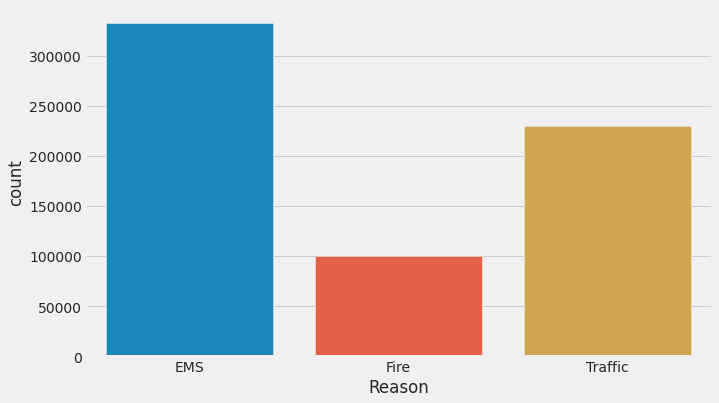

In [142]:
plt.figure(figsize=(10,6))
sns.countplot(df['Reason']);

# **Let's deal with the time information we have. Checking the datatype of the timestamp column.**

In [94]:
type(df['timeStamp'][0])

str

# **Feature Engineering**

# As the timestamps are still string types, it'll make our life easier if we convert it to a python DateTime object, so we can extract the year, month, and day information more intuitively.

In [95]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [96]:
time = df['timeStamp'].iloc[0]

print('Hour:',time.hour)
print('Month:',time.month)
print('Day of Week:',time.dayofweek)

Hour: 17
Month: 12
Day of Week: 3


# **Now let's create new features for the above pieces of information.**

In [97]:
#creating a hour column
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
#creating a month column
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
#creating a week column
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [98]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3


In [99]:
df['Month'].min()

1

# **The Day of the Week is an integer and it might not be instantly clear which number refers to which Day. We can map that information to a Mon-Sun string.**

In [100]:
wmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [101]:
df['Day of Week'] = df['Day of Week'].map(wmap)

df.tail()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1,Traffic,15,7,Wed
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1,EMS,15,7,Wed
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1,EMS,15,7,Wed
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1,Fire,15,7,Wed
663521,40.015046,-75.299674,HAVERFORD STATION RD & W MONTGOMERY AVE; LOWER...,19041.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:52:46,LOWER MERION,HAVERFORD STATION RD & W MONTGOMERY AVE,1,Traffic,15,7,Wed


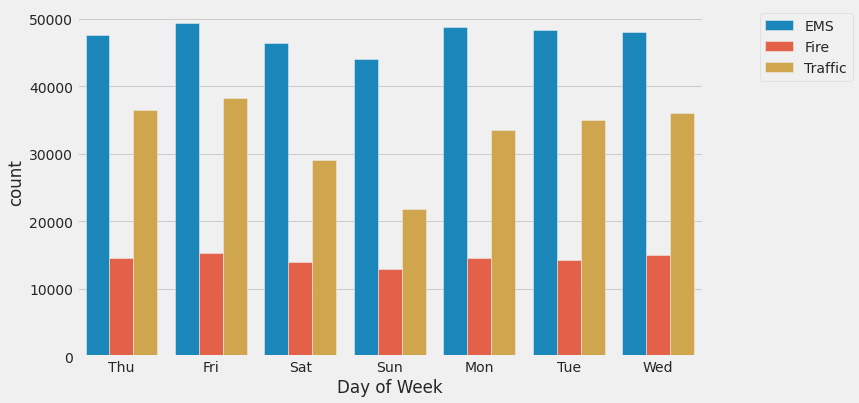

In [102]:
plt.figure(figsize=(10,6))
sns.countplot(df['Day of Week'],hue=df['Reason'])

plt.legend(bbox_to_anchor=(1.25,1))

# **observations:**

# It makes sense for the number of traffic related 911 calls to be the lowest during the weekends, what's also interesting is that Emergency Service related calls are also low during the weekend.

In [103]:
mmap = {1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}

In [104]:
df['Month'] = df['Month'].map(mmap)

df.tail()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1,Traffic,15,july,Wed
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1,EMS,15,july,Wed
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1,EMS,15,july,Wed
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1,Fire,15,july,Wed
663521,40.015046,-75.299674,HAVERFORD STATION RD & W MONTGOMERY AVE; LOWER...,19041.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:52:46,LOWER MERION,HAVERFORD STATION RD & W MONTGOMERY AVE,1,Traffic,15,july,Wed


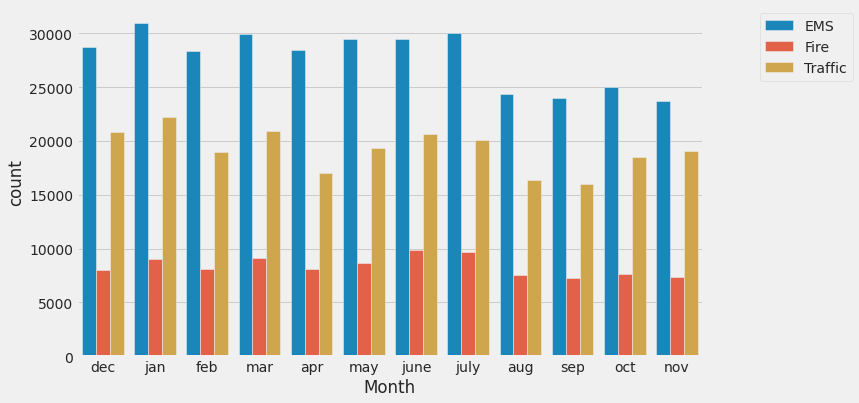

In [105]:
plt.figure(figsize=(10,6))
sns.countplot(df['Month'],hue=df['Reason'])

plt.legend(bbox_to_anchor=(1.25,1))

# **observations:**

# 1)emergency related calls to be highest during the months of jan and july

# 2)emergency calls to be lowest during the months of aug,sep,oct,nov

# 3) traffic related calls to be lowest during the month of september

# **Now, let's check out the relationship between the number of calls and the month.**

In [106]:
byMonth = df.groupby(by='Month').count()

In [107]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
apr,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
aug,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359
dec,57692,57692,57692,50783,57692,57692,57667,57692,57692,57692,57692,57692
feb,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
jan,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336


Text(0, 0.5, 'Number of Calls')

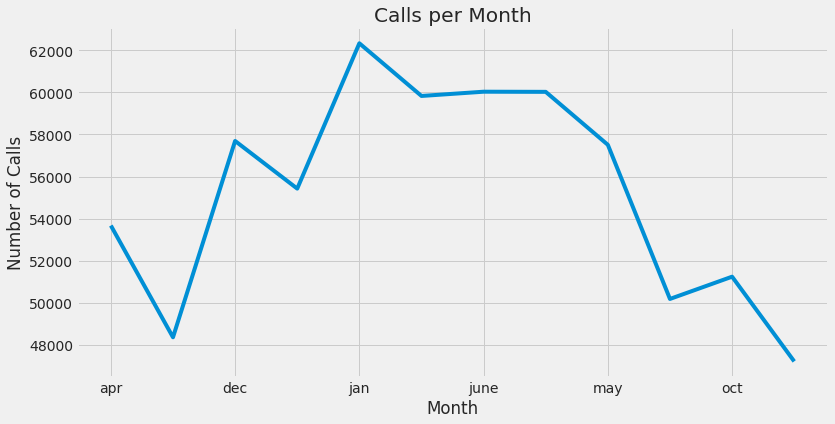

In [108]:
plt.figure(figsize=(12,6))
byMonth['e'].plot.line(y='e')
plt.title('Calls per Month')
plt.ylabel('Number of Calls')

# no.of calls per month highest in january

In [109]:
byMonth.reset_index(inplace=True)

# **creating a date column from the timestamp**

In [110]:
df['Date']=df['timeStamp'].apply(lambda x: x.date())

In [111]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,dec,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,dec,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,dec,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,dec,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,dec,Thu,2015-12-10


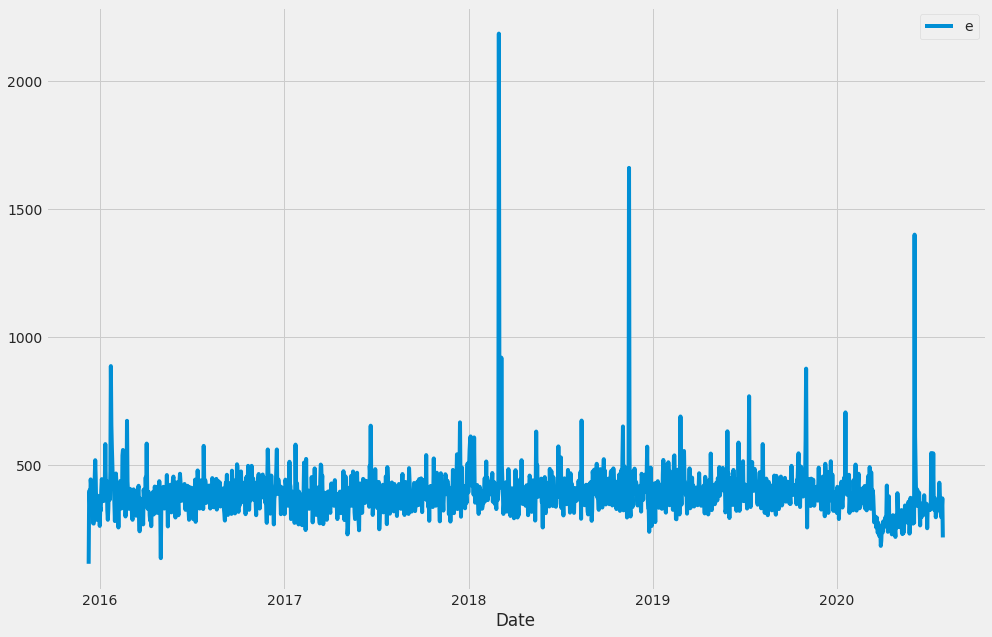

In [112]:
plt.figure(figsize=(15,10))
df.groupby('Date').count()['e'].plot.line(y='e')

plt.legend()


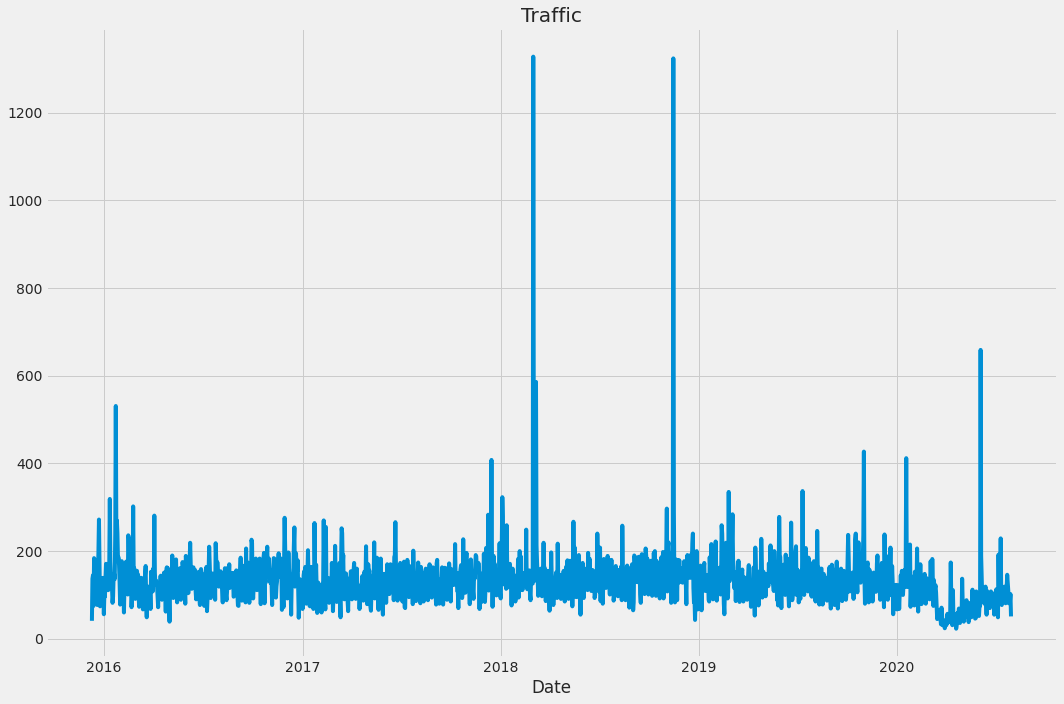

In [116]:
plt.figure(figsize=(15,10))
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

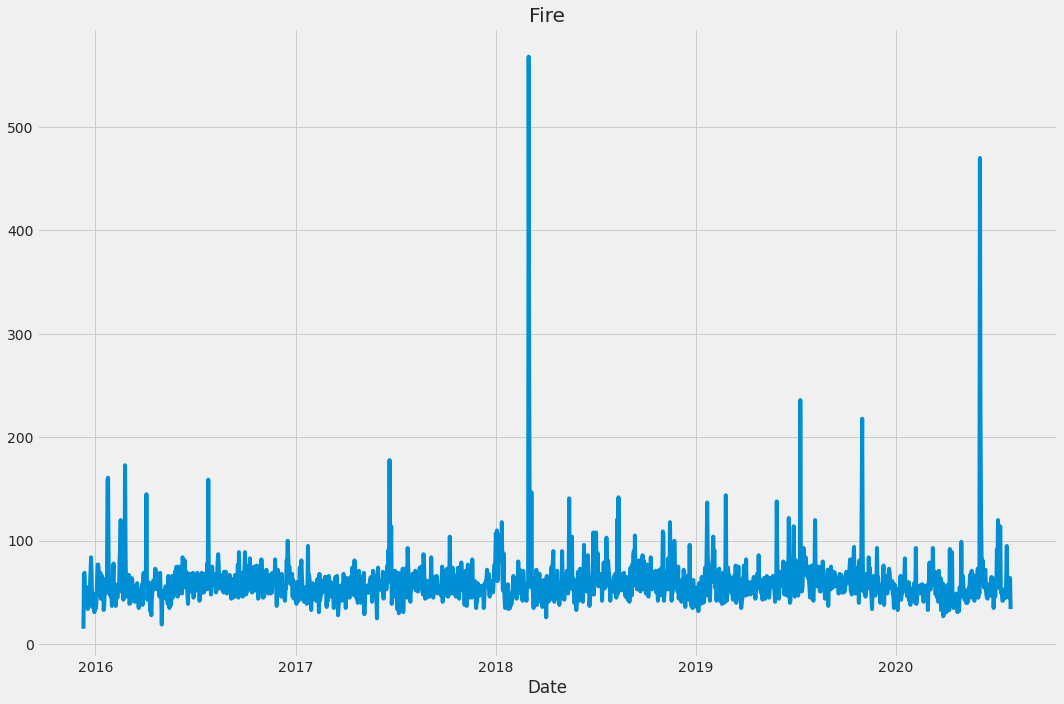

In [119]:
plt.figure(figsize=(15,10))
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

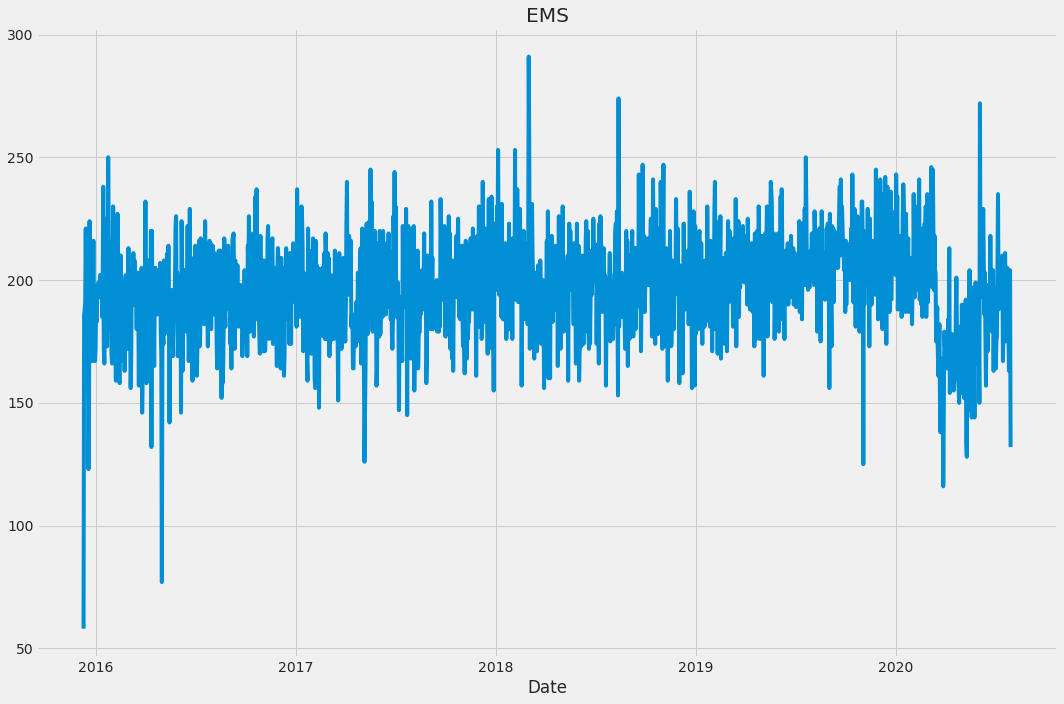

In [121]:
plt.figure(figsize=(15,10))
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()


# **We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.**

In [123]:
day_hour = df.pivot_table(values='lat',index='Day of Week',columns='Hour',aggfunc='count')

day_hour

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,5584,5843,5994,6181,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,5458,5632,5881,5664,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,4944,5450,5555,5378,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,4262,4438,4882,4654,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,5464,5492,5898,6173,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tue,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,5498,5582,5795,5794,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wed,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,5367,5639,6092,5953,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


# **Now create a HeatMap using this new DataFrame.**

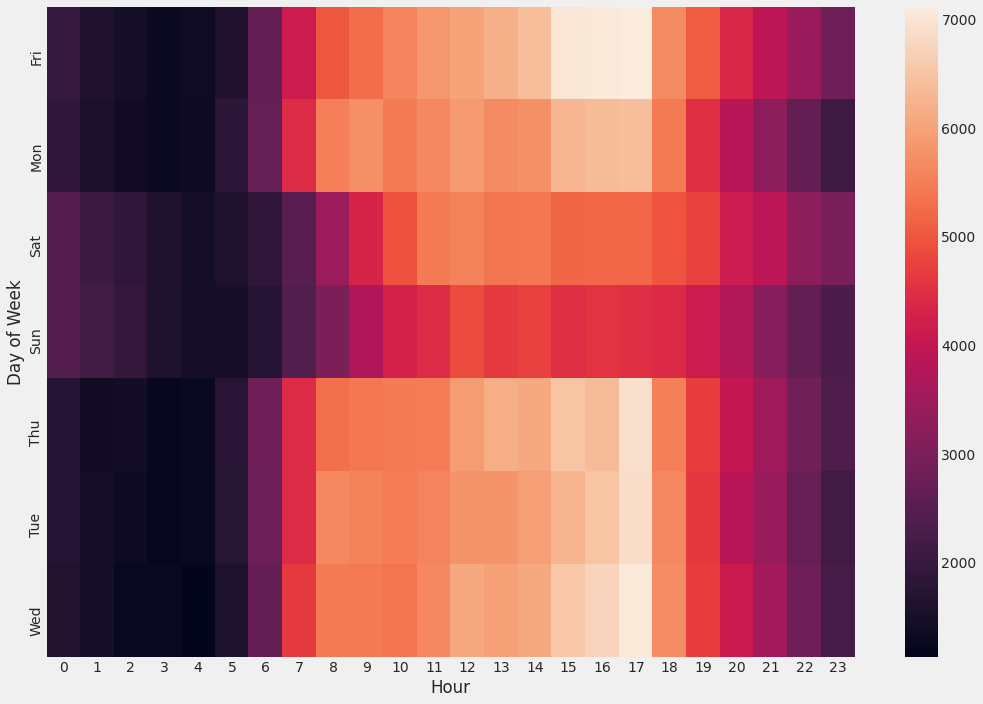

In [124]:
plt.figure(figsize=(15,10))
sns.heatmap(day_hour)

plt.tight_layout()

# **observations:**

# 1) morning and late night less no.of calls.
#  2)normal business working hours more no.of calls

<Figure size 1080x936 with 0 Axes>

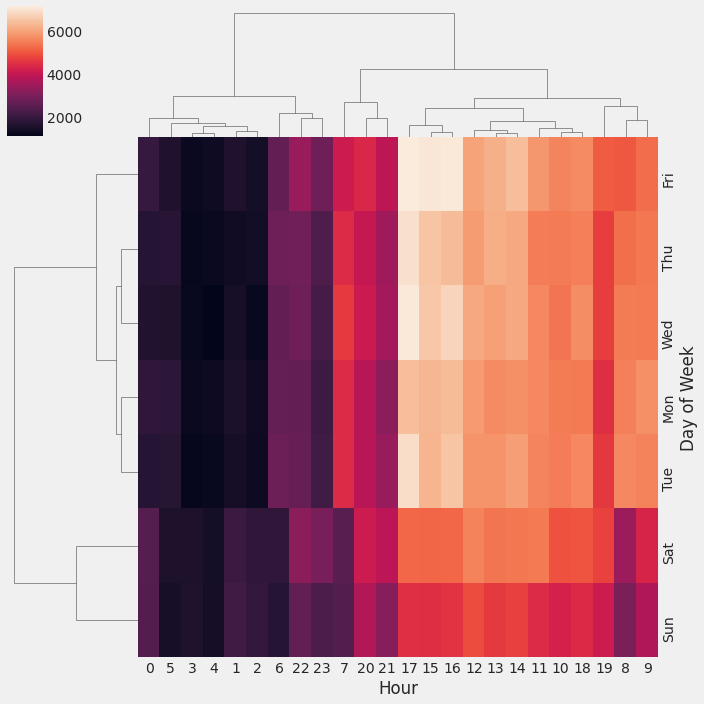

In [131]:
plt.figure(figsize=(15,13))
sns.clustermap(day_hour)

# **Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.**

In [127]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()


Month,apr,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep
Day of Week,,,,,,,,,,,,
Fri,7997,7336,9305,8255,9309,8681,9207,10941,8904,8379,6934,7694
Mon,8410,6854,8492,8747,8896,9499,8511,8060,7881,6722,8075,6598
Sat,7514,6111,8592,7593,8475,7748,8198,8050,7223,6773,6609,6566
Sun,6865,5275,7165,6452,7478,7859,6837,6766,6694,5196,6316,5956
Thu,7722,7508,8151,7997,9055,8378,9489,8849,8740,8358,7482,6954


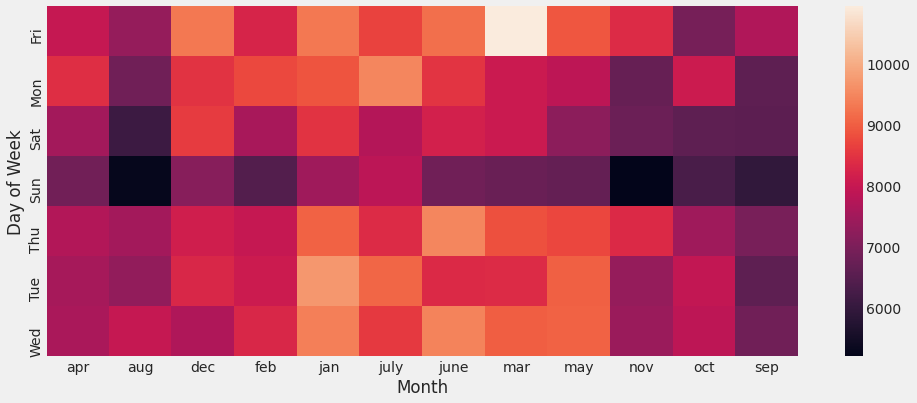

In [132]:
plt.figure(figsize=(15,6))
sns.heatmap(dayMonth)

# **observations:**

# **jan,mar,may more no.of calss**

<Figure size 1080x432 with 0 Axes>

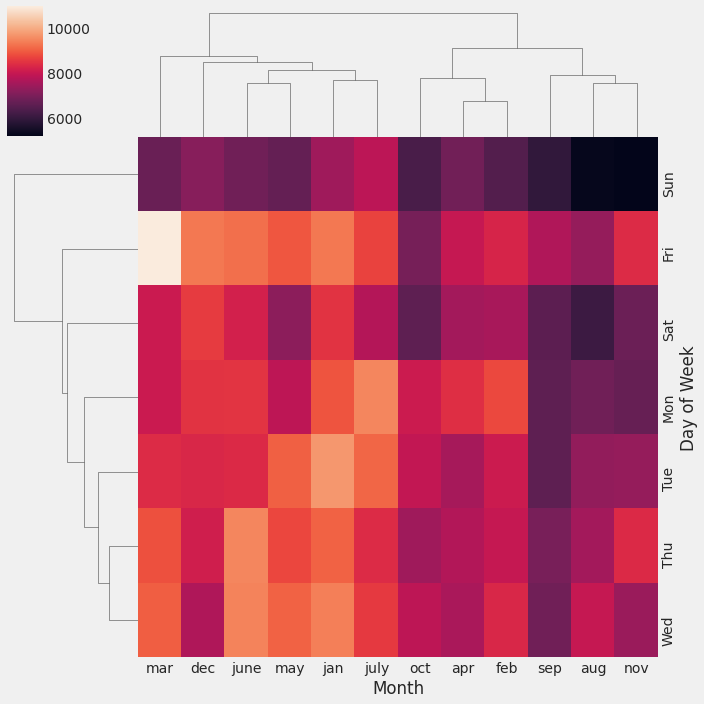

In [134]:
plt.figure(figsize=(15,6))
sns.clustermap(dayMonth)